# Imported module functionalities:
## Pandas, Numpy, seaborn, scikit-learn, matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
df = pd.read_csv('./collection1.csv', sep = ',')

In [3]:
df.sort_values(by = ['timeStamp1'], axis = 0, inplace= True)
df.reset_index(inplace=True)
df.drop(['number', '_id', '__v', 'timeStamp1', 'index'], axis = 'columns', inplace = True)

In [4]:
df.columns

Index(['accX', 'accY', 'accZ', 'gyroAlpha', 'gyroGamma', 'gyroBeta',
       'quality'],
      dtype='object')

<img src="device-alpha-beta-gamma.png">
<img src="axes.png">

In [5]:
df.head()

,accX,accY,accZ,gyroAlpha,gyroGamma,gyroBeta,quality
0,-0.149033,1.406830,9.685318,95.016434,0.825390,8.385794,False
1,-0.139465,1.425980,9.649399,95.016434,0.825390,8.385794,False
2,-0.146652,1.423584,9.673340,95.016434,0.825390,8.385794,False
3,-0.127487,1.433167,9.692490,95.016434,0.825390,8.385794,True
4,-0.132278,1.433167,9.582367,94.743742,0.937941,8.342362,False


In [6]:
pot = df[df['quality'] == True]
straight = df[df['quality'] == False]
print("Samples of potholes: {}".format(pot.size))
print("Samples of not potholes: {}".format(straight.size))

Samples of potholes: 16947
Samples of not potholes: 58065


# Creating a pairplot for general overview


C:\Users\Room-dweller\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Room-dweller\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


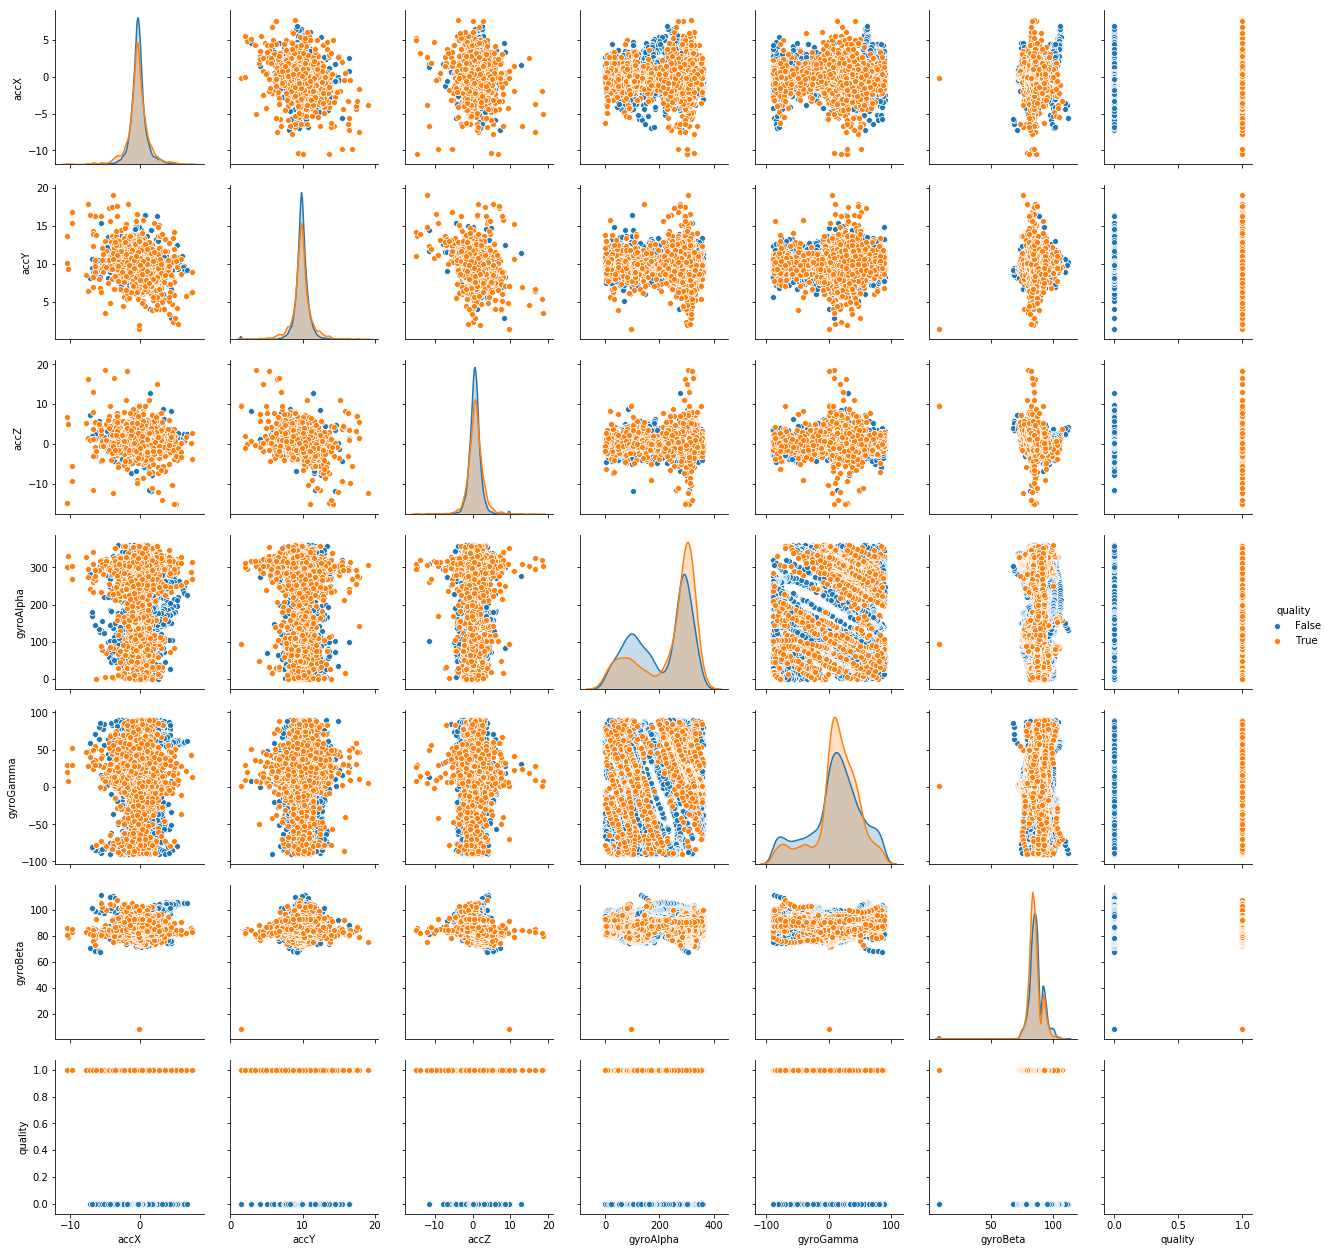

In [7]:
sns.pairplot(df[['accX', 'accY', 'accZ', 'gyroAlpha', 'gyroGamma', 'gyroBeta', 'quality']], hue = 'quality');

# Machine learning model

In [8]:
#Seperating the dataset to training and testing data 
train_X, test_X, train_Y, test_Y = train_test_split(
    df[['accX', 'accY', 'accZ', 'gyroAlpha', 'gyroGamma', 'gyroBeta']],
    df['quality'])

In [9]:
clf = SVC(kernel='rbf', C=5, gamma = 0.01)

In [10]:
#Fitting the training data to classifier
clf.fit(train_X,train_Y)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
clf.score(test_X, test_Y)

0.8413587159387831

In [12]:
#Serializing model
filename = 'defaultSVM'
pickle.dump(clf, open(filename, 'wb'))